<a href="https://colab.research.google.com/github/nandigama/.vim/blob/master/LiveSession5_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks

Linear Regression with a Neural Network

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

In [ ]:
# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
X.shape

torch.Size([50, 1])

In [ ]:
y.shape

torch.Size([50, 1])

In [ ]:
X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# Create a Linear Regression model Class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) # start with random weights, PyTorch loves float32 by default, update with gradient descent
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # self.pooling = nn.AvgPool1d()
    # self.hidden1 = nn.Hidden()
    # self.softmax = nn.Softmax()
    # self.embedding = nn.Embedding.from_pretrained(glove)


  # Forward defines the computation in the model
  def forward(self, x): # "x" is the input data (eg. training/testing feature)
    return self.weights * x + self.bias # this is the linear regression formula (y = m*x + b)

    # output1 = self.pooling(x)
    # output2 = self.hidden1(output1)
    # output3 = self.softmax(output2)



In [ ]:
model = LinearRegressionModel()
model

LinearRegressionModel()

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test)

  for values in zip(y_test, y_preds):
    print(values)

(tensor([0.8600]), tensor([-2.1058]))
(tensor([0.8740]), tensor([-2.0953]))
(tensor([0.8880]), tensor([-2.0849]))
(tensor([0.9020]), tensor([-2.0744]))
(tensor([0.9160]), tensor([-2.0639]))
(tensor([0.9300]), tensor([-2.0534]))
(tensor([0.9440]), tensor([-2.0430]))
(tensor([0.9580]), tensor([-2.0325]))
(tensor([0.9720]), tensor([-2.0220]))
(tensor([0.9860]), tensor([-2.0115]))


In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=.01)

In [ ]:
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs+1):

  # train
  model.train()
  y_pred = model(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # evaluation
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

  # print out
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch:03} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 000 | Train Loss: 2.89354 | Test Loss: 2.96820
Epoch: 010 | Train Loss: 2.77833 | Test Loss: 2.83349
Epoch: 020 | Train Loss: 2.66312 | Test Loss: 2.69878
Epoch: 030 | Train Loss: 2.54791 | Test Loss: 2.56407
Epoch: 040 | Train Loss: 2.43270 | Test Loss: 2.42936
Epoch: 050 | Train Loss: 2.31749 | Test Loss: 2.29465
Epoch: 060 | Train Loss: 2.20228 | Test Loss: 2.15994
Epoch: 070 | Train Loss: 2.08707 | Test Loss: 2.02523
Epoch: 080 | Train Loss: 1.97186 | Test Loss: 1.89052
Epoch: 090 | Train Loss: 1.85665 | Test Loss: 1.75581
Epoch: 100 | Train Loss: 1.74144 | Test Loss: 1.62110
Epoch: 110 | Train Loss: 1.62623 | Test Loss: 1.48639
Epoch: 120 | Train Loss: 1.51102 | Test Loss: 1.35168
Epoch: 130 | Train Loss: 1.39581 | Test Loss: 1.21697
Epoch: 140 | Train Loss: 1.28060 | Test Loss: 1.08226
Epoch: 150 | Train Loss: 1.16539 | Test Loss: 0.94755
Epoch: 160 | Train Loss: 1.05018 | Test Loss: 0.81284
Epoch: 170 | Train Loss: 0.93497 | Test Loss: 0.67813
Epoch: 180 | Train Loss: 0.8

In [ ]:
with torch.inference_mode():
  y_preds = model(X_train)

  for values in zip(y_train, y_preds):
    print(values)

(tensor([0.3000]), tensor([0.2947]))
(tensor([0.3140]), tensor([0.3088]))
(tensor([0.3280]), tensor([0.3229]))
(tensor([0.3420]), tensor([0.3370]))
(tensor([0.3560]), tensor([0.3512]))
(tensor([0.3700]), tensor([0.3653]))
(tensor([0.3840]), tensor([0.3794]))
(tensor([0.3980]), tensor([0.3935]))
(tensor([0.4120]), tensor([0.4076]))
(tensor([0.4260]), tensor([0.4217]))
(tensor([0.4400]), tensor([0.4359]))
(tensor([0.4540]), tensor([0.4500]))
(tensor([0.4680]), tensor([0.4641]))
(tensor([0.4820]), tensor([0.4782]))
(tensor([0.4960]), tensor([0.4923]))
(tensor([0.5100]), tensor([0.5064]))
(tensor([0.5240]), tensor([0.5206]))
(tensor([0.5380]), tensor([0.5347]))
(tensor([0.5520]), tensor([0.5488]))
(tensor([0.5660]), tensor([0.5629]))
(tensor([0.5800]), tensor([0.5770]))
(tensor([0.5940]), tensor([0.5911]))
(tensor([0.6080]), tensor([0.6053]))
(tensor([0.6220]), tensor([0.6194]))
(tensor([0.6360]), tensor([0.6335]))
(tensor([0.6500]), tensor([0.6476]))
(tensor([0.6640]), tensor([0.6617]))
(

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test)

  for values in zip(y_test, y_preds):
    print(values)

(tensor([0.8600]), tensor([0.8594]))
(tensor([0.8740]), tensor([0.8735]))
(tensor([0.8880]), tensor([0.8876]))
(tensor([0.9020]), tensor([0.9017]))
(tensor([0.9160]), tensor([0.9158]))
(tensor([0.9300]), tensor([0.9299]))
(tensor([0.9440]), tensor([0.9441]))
(tensor([0.9580]), tensor([0.9582]))
(tensor([0.9720]), tensor([0.9723]))
(tensor([0.9860]), tensor([0.9864]))


In [ ]:
y_example = weight * 42 + bias
y_example

29.7

In [ ]:
with torch.inference_mode():
  y_pred = model(42)
  print(y_pred)

tensor([29.9398])


In [ ]:
import matplotlib.pyplot as plt

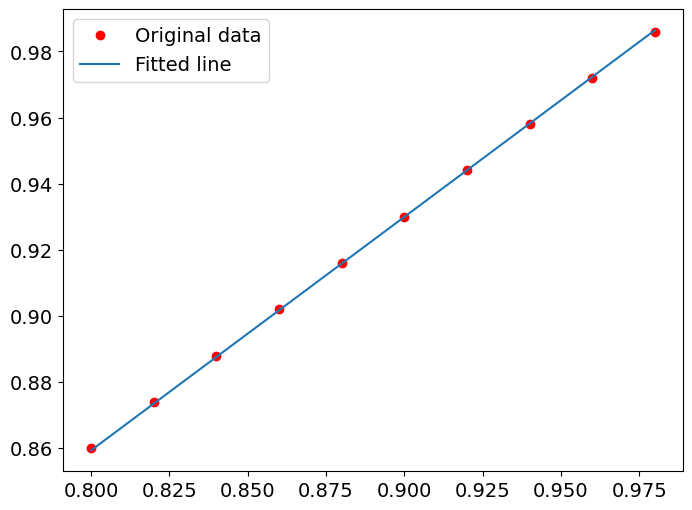

In [ ]:
# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 14

y_pred = model(X).detach().numpy()
plt.plot(X_test, y_test, 'ro', label='Original data')
plt.plot(X_test, y_preds, label='Fitted line')
plt.legend()
plt.show()

RNN (Recurrent Neural Network)

https://ethen8181.github.io/machine-learning/deep_learning/rnn/1_pytorch_rnn.html

In [ ]:
import numpy as np

In [ ]:
torch.manual_seed(777)

# suppose we have a
# one hot encoding for each char in 'hello'
# and the sequence length for the word 'hello' is 5
seq_len = 5
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [ ]:
# here we specify a single RNN cell with the property of
# input_dim (4) -> output_dim (2)
# batch_first explained in the following
rnn_cell = nn.RNN(input_size=4, hidden_size=2, batch_first=True)
rnn_cell

In [ ]:
# our input shape should be of shape
# (batch, seq_len, input_size) when batch_first=True;
# the input size basically refers to the number of features
# (seq_len, batch_size, input_size) when batch_first=False (default)
# thus we reshape our input to the appropriate size, torch.view is
# equivalent to numpy.reshape
inputs = torch.Tensor([h, e, l, l, o])
inputs = inputs.view(1, 5, -1)

In [ ]:
# our hidden is the weights that gets passed along the cells,
# here we initialize some random values for it:
# (batch, num_layers * num_directions, hidden_size) for batch_first=True
# disregard the second argument as of now
hidden = torch.zeros(1, 1, 2)
out, hidden = rnn_cell(inputs, hidden)
print('sequence input size', inputs.size())
print('out size', out.size())
print('sequence size', hidden.size())

In [ ]:
# the first value returned by the rnn cell is all
# of the hidden state throughout the sequence, while
# the second value is the most recent hidden state;
# hence we can compare the last slice of the the first
# value with the second value to confirm that they are
# the same
print('\ncomparing rnn cell output:')
print(out[:, -1, :])
hidden[0]

In [ ]:
# create an index to character mapping
idx2char = ['h', 'i', 'e', 'l', 'o']

In [ ]:
# Teach hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]    # hihell
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3

In [ ]:
x_one_hot = np.array(x_one_hot)
y_data = np.array([1, 0, 2, 3, 3, 4])  # ihello

In [ ]:
# As we have one batch of samples, we will change them to variables only once
inputs = torch.Tensor(x_one_hot)
labels = torch.LongTensor(y_data)

In [ ]:
# hyperparameters
seq_len = 6      # |hihell| == 6, equivalent to time step
input_size = 5   # one-hot size
batch_size = 1   # one sentence per batch
num_layers = 1   # one-layer rnn
num_classes = 5  # predicting 5 distinct character
hidden_size = 4  # output from the RNN

In [ ]:
# Dense Example

self.embed_layer = nn.Embedding(num_embeddings=input_size, embedding_dim=hidden_size)
self.hidden = nn.Linear()
self.softmax = nn.Softmax()

def forward(x):
  output = self.embed_layer(x)
  output = self.hidden(output)
  output = self.softmax(output)
  return output

In [ ]:
class RNN(nn.Module):
    """
    The RNN model will be a RNN followed by a linear layer,
    i.e. a fully-connected layer
    """
    def __init__(self, seq_len, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.seq_len = seq_len
        self.num_layers = num_layers
        self.input_size = input_size
        self.num_classes = num_classes
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # assuming batch_first = True for RNN cells
        batch_size = x.size(0)
        hidden = self._init_hidden(batch_size)
        x = x.view(batch_size, self.seq_len, self.input_size)

        # apart from the output, rnn also gives us the hidden
        # cell, this gives us the opportunity to pass it to
        # the next cell if needed; we won't be needing it here
        # because the nn.RNN already computed all the time steps
        # for us. rnn_out will of size [batch_size, seq_len, hidden_size]
        rnn_out, _ = self.rnn(x, hidden)
        linear_out = self.linear(rnn_out.view(-1, hidden_size))
        return linear_out

    def _init_hidden(self, batch_size):
        """
        Initialize hidden cell states, assuming
        batch_first = True for RNN cells
        """
        return torch.zeros(batch_size, self.num_layers, self.hidden_size)

In [ ]:
# Set loss, optimizer and the RNN model
torch.manual_seed(777)
rnn = RNN(seq_len, num_classes, input_size, hidden_size, num_layers)
print('network architecture:\n', rnn)

# train the model
num_epochs = 15
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.1)
for epoch in range(1, num_epochs + 1):
    optimizer.zero_grad()
    outputs = rnn(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # check the current predicted string
    # max gives the maximum value and its
    # corresponding index, we will only
    # be needing the index
    _, idx = outputs.max(dim = 1)
    idx = idx.detach().numpy()
    result_str = [idx2char[c] for c in idx]
    print('epoch: {}, loss: {:1.3f}'.format(epoch, loss.item()))
    print('Predicted string: ', ''.join(result_str))

LSTM

In [ ]:
# These will usually be more like 32 or 64 dimensional.
# We will keep them small for this toy example
EMBEDDING_SIZE = 6
HIDDEN_SIZE = 6

training_data = [
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])
]

idx_to_tag = ['DET', 'NN', 'V']
tag_to_idx = {'DET': 0, 'NN': 1, 'V': 2}

word_to_idx = {}
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_idx:
            word_to_idx[word] = len(word_to_idx)

word_to_idx

In [ ]:
def prepare_sequence(seq, to_idx):
    """Convert sentence/sequence to torch Tensors"""
    idxs = [to_idx[w] for w in seq]
    return torch.LongTensor(idxs)

seq = training_data[0][0]
inputs = prepare_sequence(seq, word_to_idx)
inputs

In [ ]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_size, hidden_size, vocab_size, tagset_size):
        super().__init__()
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size
        self.tagset_size = tagset_size

        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size)
        self.hidden2tag = nn.Linear(hidden_size, tagset_size)

    def forward(self, x):
        embed = self.embedding(x)
        hidden = self._init_hidden()

        # the second dimension refers to the batch size, which we've hard-coded
        # it as 1 throughout the example
        lstm_out, lstm_hidden = self.lstm(embed.view(len(x), 1, -1), hidden)
        output = self.hidden2tag(lstm_out.view(len(x), -1))
        return output

    def _init_hidden(self):
        # the dimension semantics are [num_layers, batch_size, hidden_size]
        return (torch.rand(1, 1, self.hidden_size),
                torch.rand(1, 1, self.hidden_size))

In [ ]:
model = LSTMTagger(EMBEDDING_SIZE, HIDDEN_SIZE, len(word_to_idx), len(tag_to_idx))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs = 300
for epoch in range(epochs):
    for sentence, tags in training_data:
        model.zero_grad()

        sentence = prepare_sequence(sentence, word_to_idx)
        target = prepare_sequence(tags, tag_to_idx)

        output = model(sentence)
        print([idx_to_tag[idx] for idx in np.argmax(output.detach().numpy(), axis=1)])
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

In [ ]:
inputs = prepare_sequence(training_data[0][0], word_to_idx)
tag_scores = model(inputs)

# validating that the sentence "the dog ate the apple".
# the correct tag should be DET NOUN VERB DET NOUN
print('expected target: ', training_data[0][1])

tag_scores = tag_scores.detach().numpy()
tag = [idx_to_tag[idx] for idx in np.argmax(tag_scores, axis = 1)]
print('generated target: ', tag)